<a href="https://colab.research.google.com/github/siva-sankar-a/eva/blob/master/S10/EVA4_Session_10_LR_range_finder_GradCam_with_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S10 _Assignment 10_

  | Summary of overall targets |  |
  | - | - |
  | _Dataset_| **CIFAR10** |
  | _Max. number of epochs_| **50** |
  | _Max. number of parameters_| **NA** |
  | _Architecture_| **Resnet18** |
  | _Target accurracy_| **88%** |


# Implementation

## Initialization

### Mounting google drive to save results

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install torchsummary
!pip install torchviz

     |████████████████████████████████| 51kB 7.4MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3523 sha256=ae7b6dba1834ff1f3453e7c506d94aae9bdae324981537cb2b431c1e131ba5fc
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [0]:
import glob
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
import torch
import torchvision
import numpy as np

from torch.nn import functional as F
import cv2

In [9]:
!rm -rf eva
!git clone "https://github.com/siva-sankar-a/eva.git"

Cloning into 'eva'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 468 (delta 103), reused 107 (delta 48), pack-reused 291
Receiving objects: 100% (468/468), 4.99 MiB | 3.00 MiB/s, done.
Resolving deltas: 100% (260/260), done.


In [11]:
%load_ext autoreload
%autoreload 2
from eva.S10.api import Experiment
from eva.S10.data_manager.data_manager_albumentations import  DataManager
from eva.S10.viz import viz_cifar10_grid_
from eva.S10.utils import textual_summary_cifar10, graphical_summary_cifar10
from eva.S10.settings import cifar10_classes
from eva.S10.models.model_s10 import ResNet, ResNet18
from eva.S10.grad_cam.grad_cam import GradCam

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create an instance of experiment class

In [12]:
experiment = Experiment(name=f'default', dataset_name='cifar10')

CUDA status: True
Files already downloaded and verified
Files already downloaded and verified


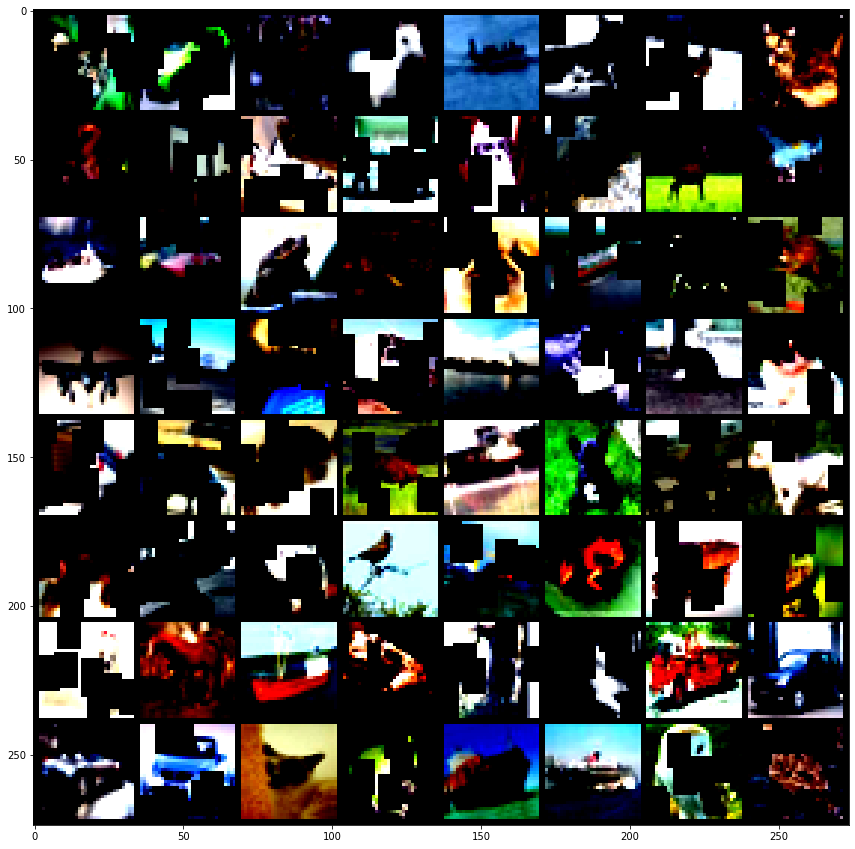

In [13]:
viz_cifar10_grid_(experiment.data_manager.train_loader)

In [14]:
textual_summary_cifar10(experiment.model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

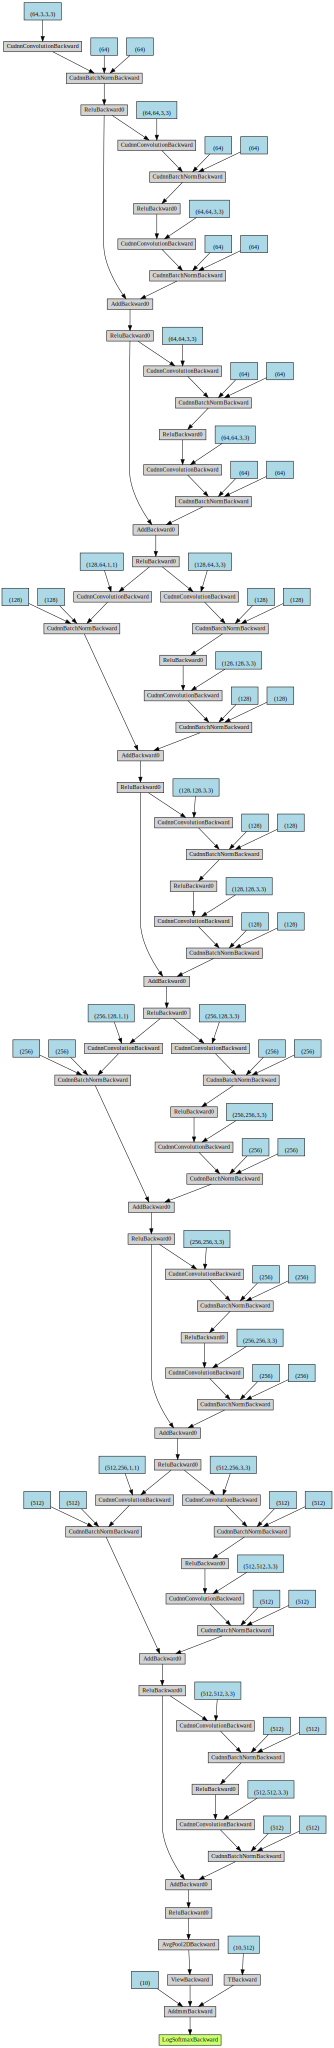

In [0]:
graphical_summary_cifar10(experiment.model)

# LR range finder


Learning rate search finished. See the graph with {finder_name}.plot()


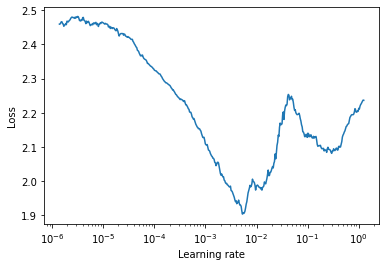

Selected learning rate : 0.005303390295974032


In [15]:
momentum = 0.9
weight_decay = 0.01
selected_lr = experiment.lr_range_test(momentum=momentum, weight_decay=weight_decay)

In [16]:
experiment.run(epochs=50, momentum=momentum, lr=selected_lr, regularization=None, weight_decay=weight_decay)

TRAIN : epoch=0 train_loss=0.02449 correct/total=21468/50000 accuracy=42.94: 100%|██████████| 782/782 [00:59<00:00, 13.07it/s]
TEST :  epoch=0 test_loss=1.18968 correct/total=5690/10000 accuracy=56.90: 100%|██████████| 157/157 [00:03<00:00, 42.57it/s]
TRAIN : epoch=1 train_loss=0.01832 correct/total=28935/50000 accuracy=57.87: 100%|██████████| 782/782 [01:01<00:00, 12.78it/s]
TEST :  epoch=1 test_loss=0.96327 correct/total=6555/10000 accuracy=65.55: 100%|██████████| 157/157 [00:03<00:00, 42.63it/s]
TRAIN : epoch=2 train_loss=0.01511 correct/total=32764/50000 accuracy=65.53: 100%|██████████| 782/782 [01:01<00:00, 12.82it/s]
TEST :  epoch=2 test_loss=0.75552 correct/total=7395/10000 accuracy=73.95: 100%|██████████| 157/157 [00:03<00:00, 42.17it/s]
TRAIN : epoch=3 train_loss=0.01321 correct/total=35020/50000 accuracy=70.04: 100%|██████████| 782/782 [01:01<00:00, 12.82it/s]
TEST :  epoch=3 test_loss=0.70582 correct/total=7514/10000 accuracy=75.14: 100%|██████████| 157/157 [00:03<00:00, 41.

# Accuracy curve

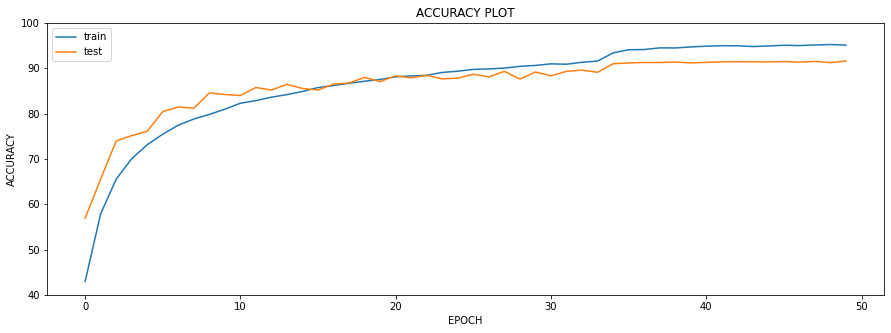

In [21]:
experiment.load_summary()
experiment.plot_metric()

# Grad cam of mis-classified images

In [0]:
target_layers = ['layer1.0.bn2', 'layer1.1.bn2', 'layer2.0.bn2', 'layer2.1.bn2', 'layer3.0.bn2', 'layer3.1.bn2', 'layer4.0.bn2', 'layer4.1.bn2']

In [0]:
mis_classified_images = experiment.get_mis_classified()
grad_cam = GradCam(experiment.model, data_manager=experiment.data_manager, target_layers=target_layers, device=experiment.device)

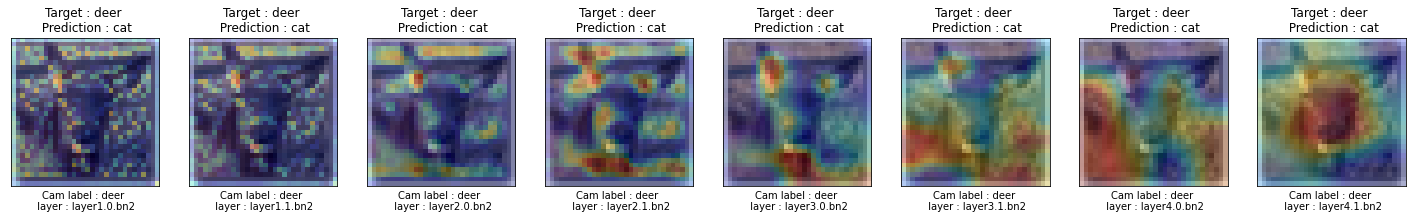

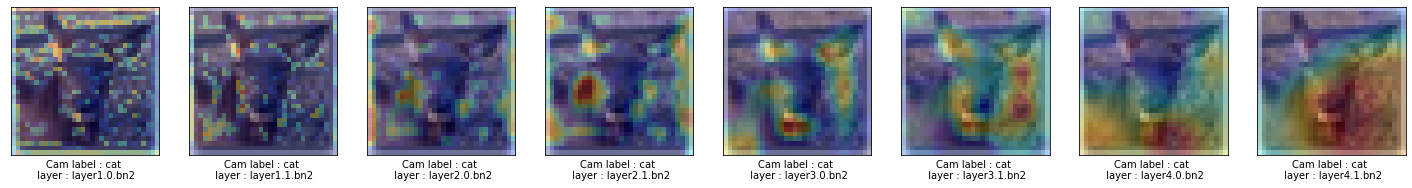

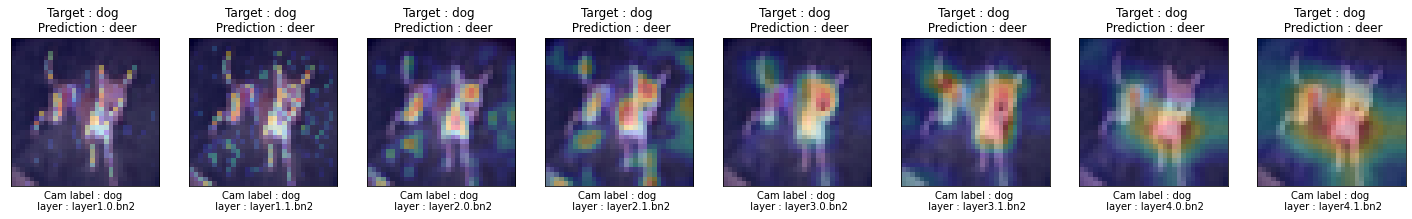

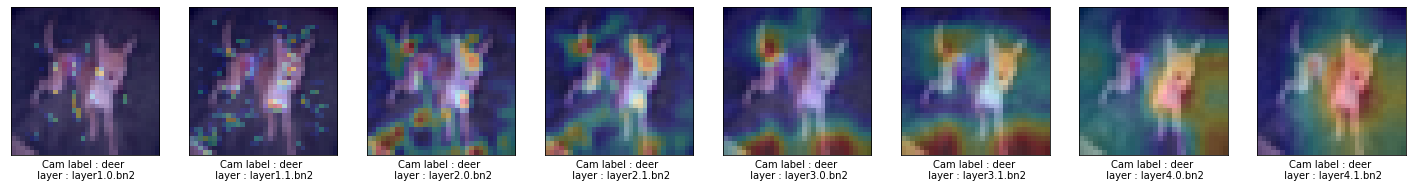

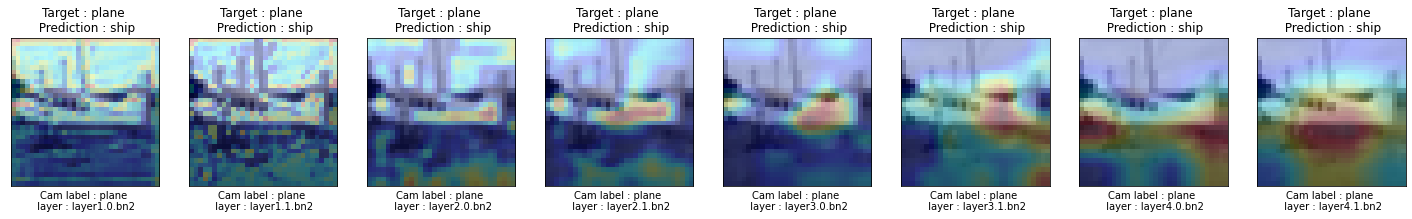

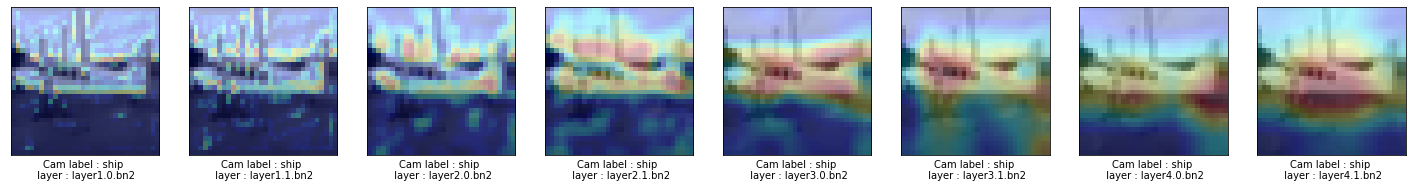

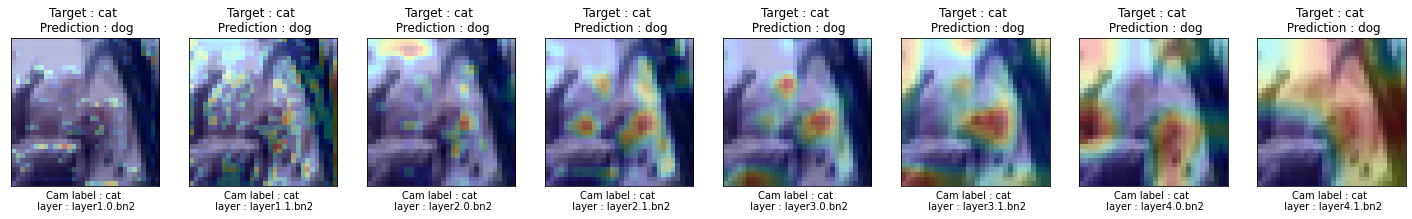

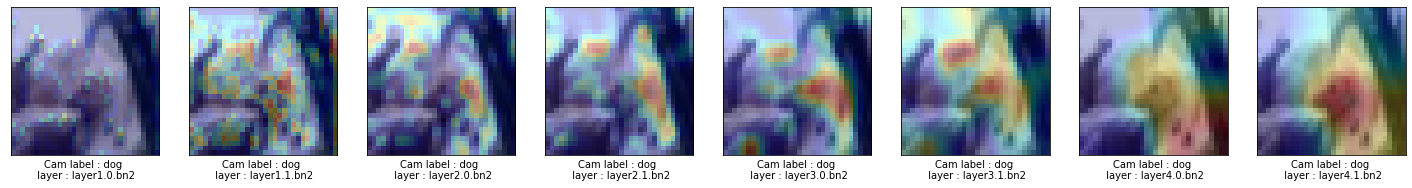

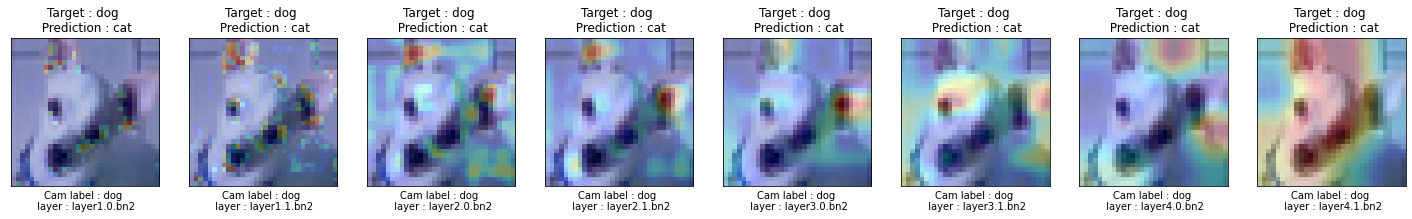

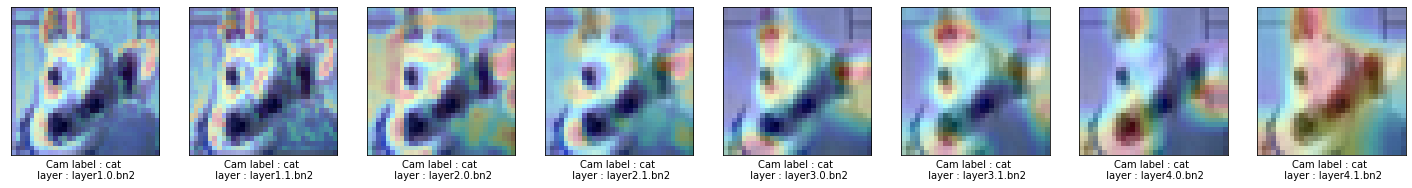

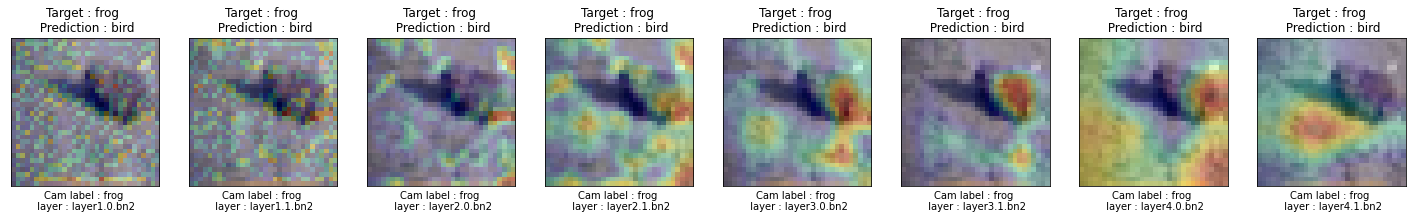

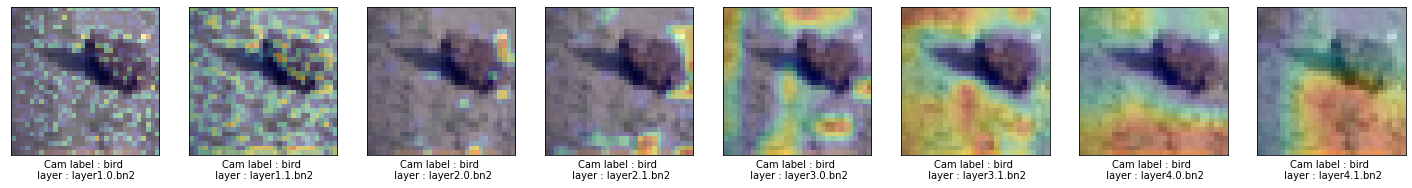

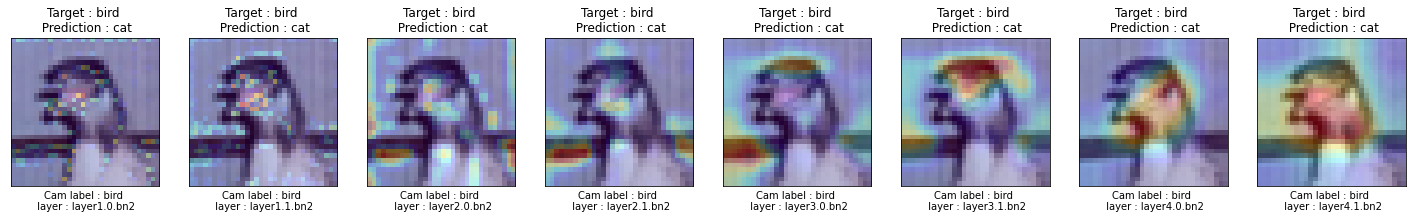

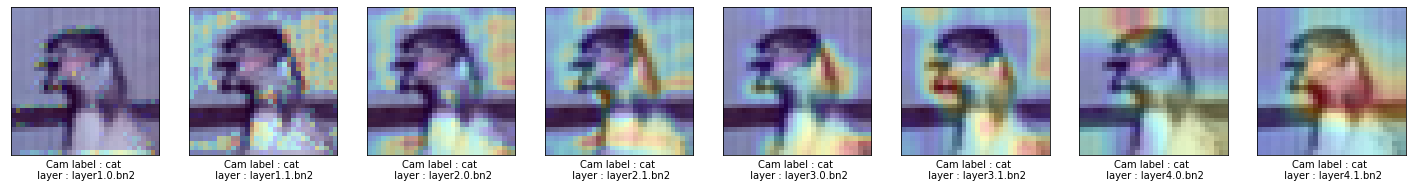

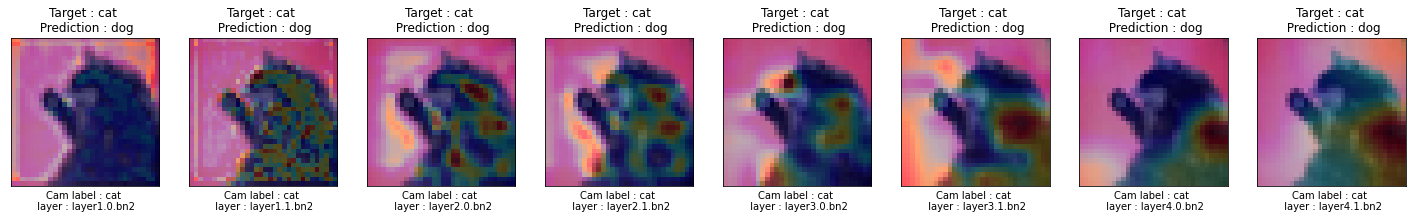

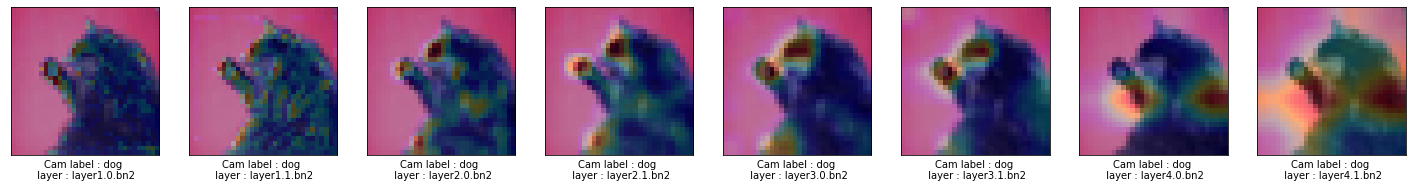

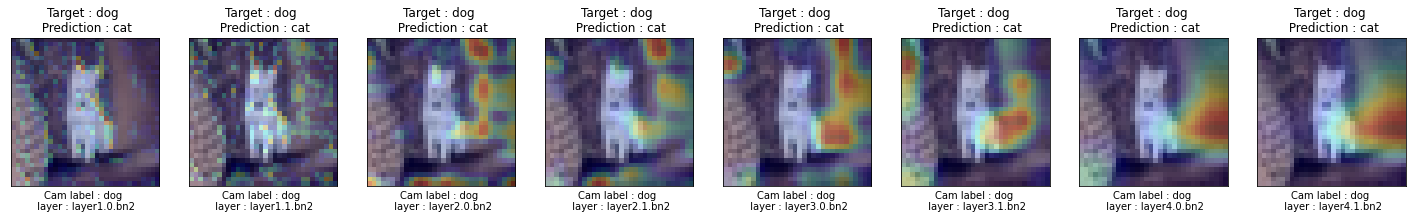

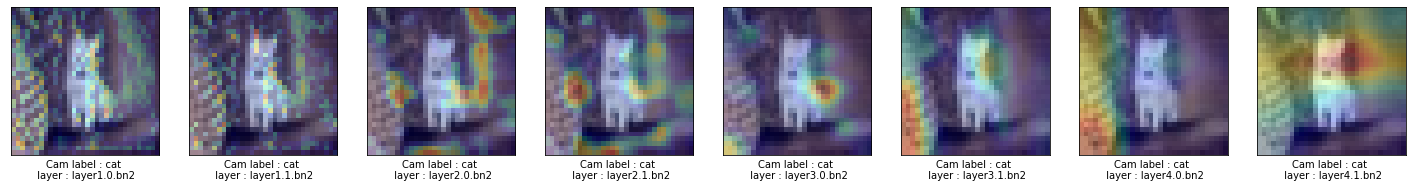

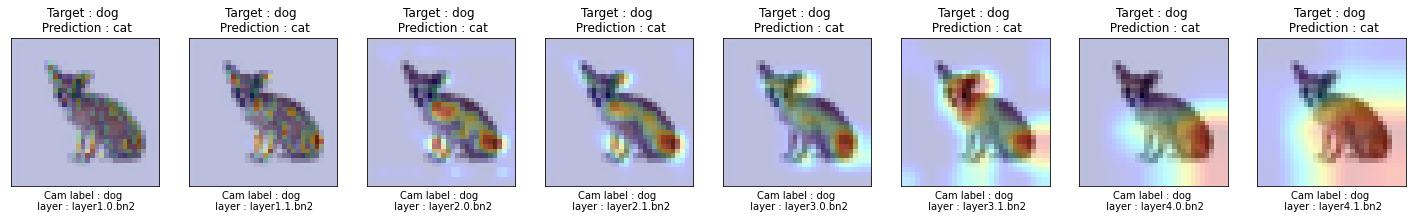

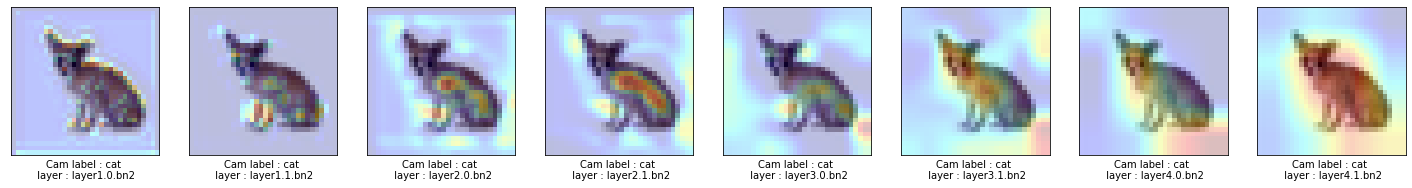

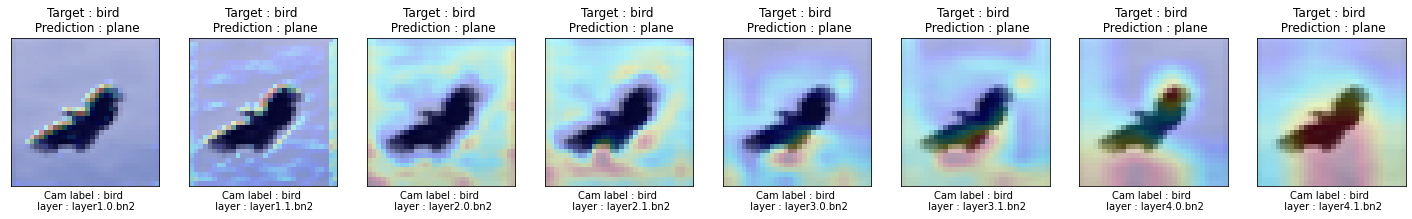

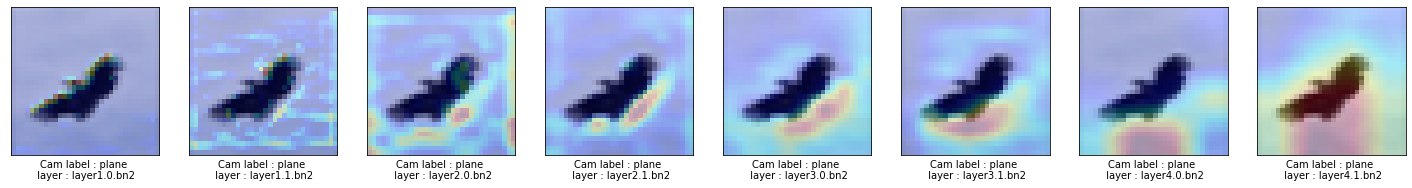

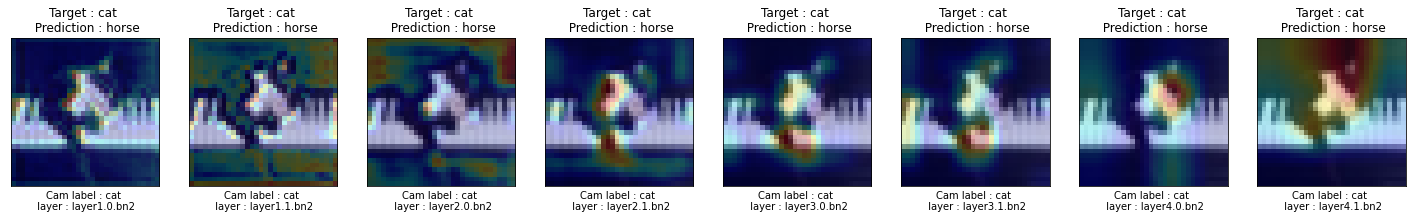

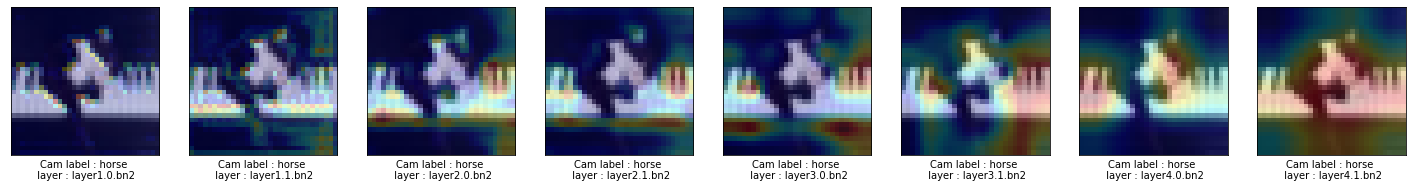

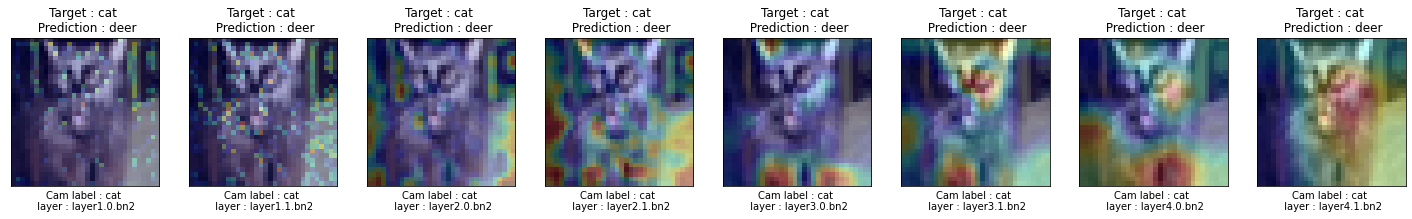

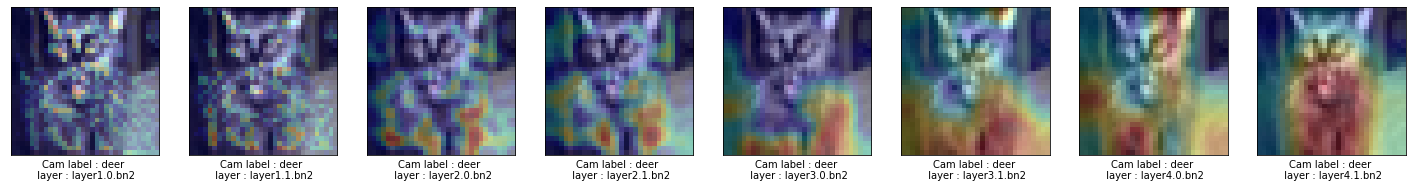

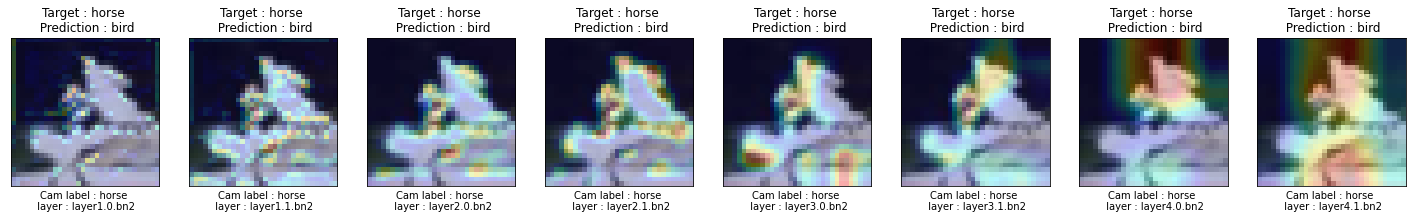

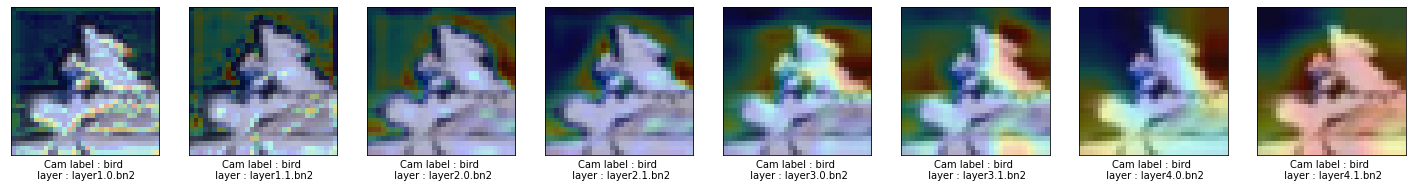

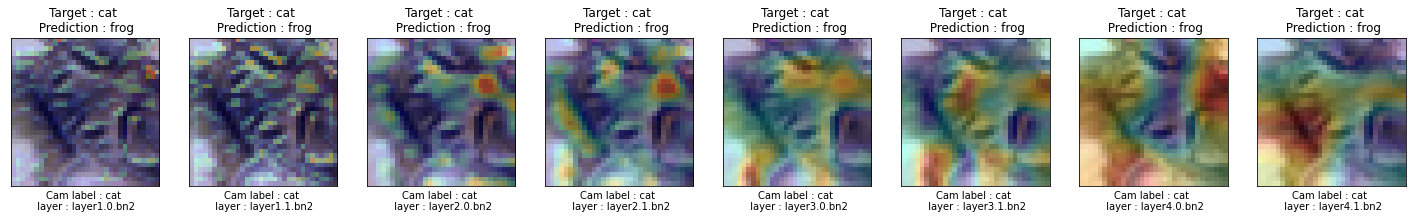

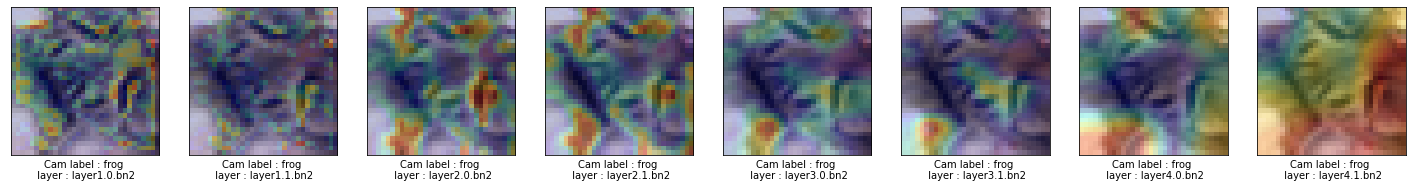

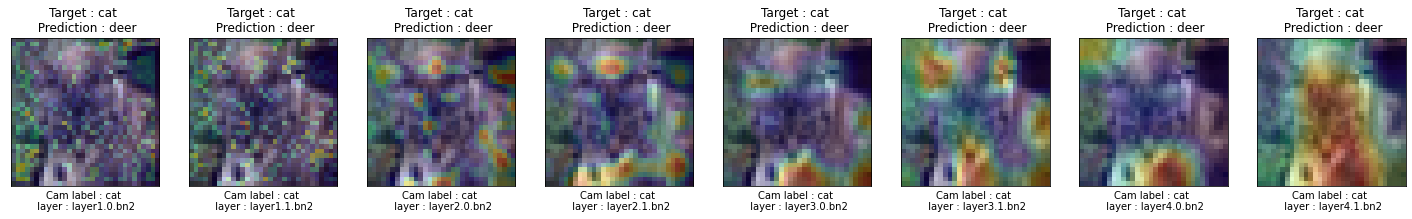

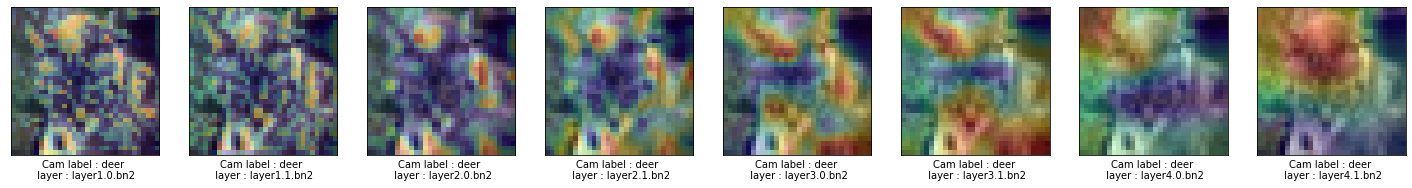

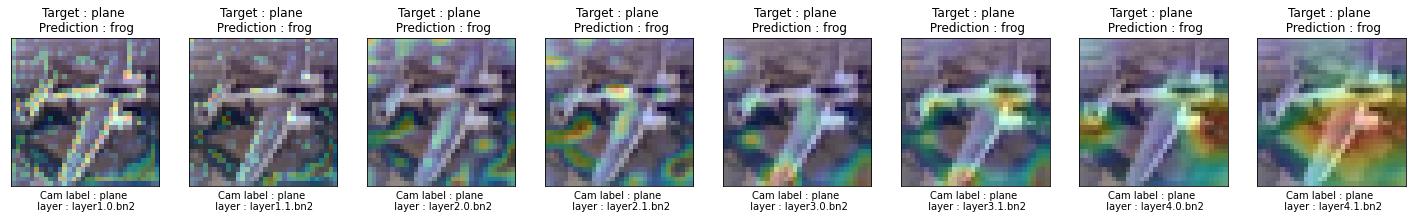

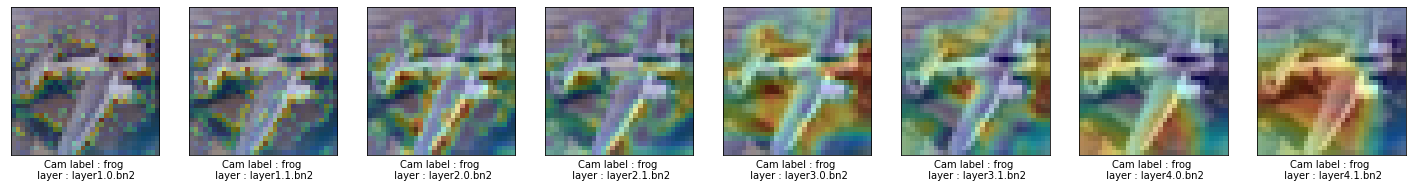

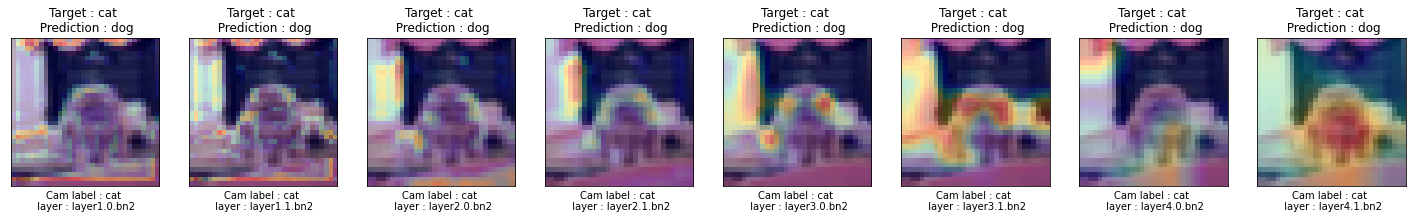

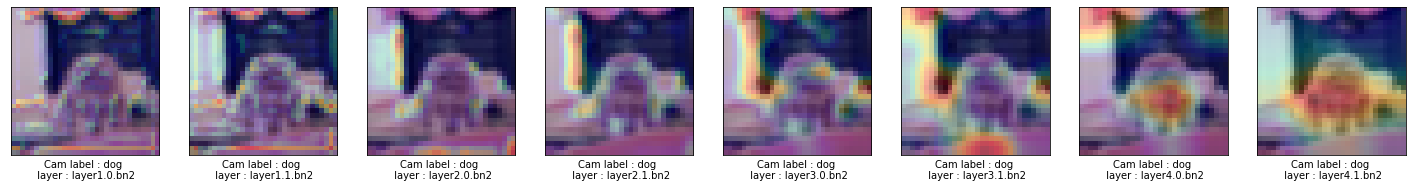

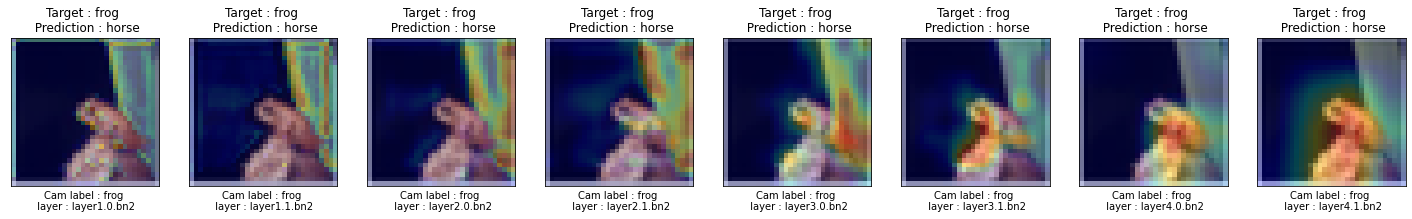

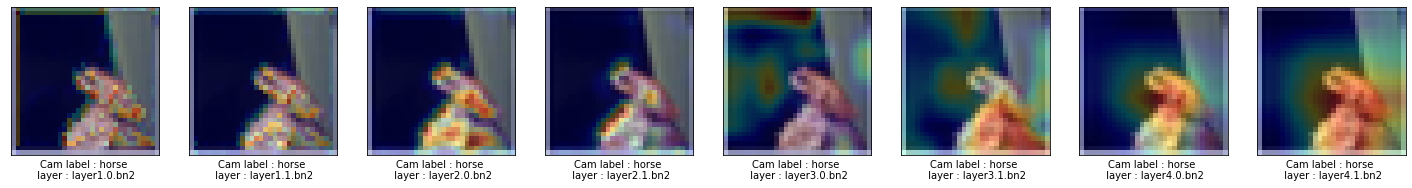

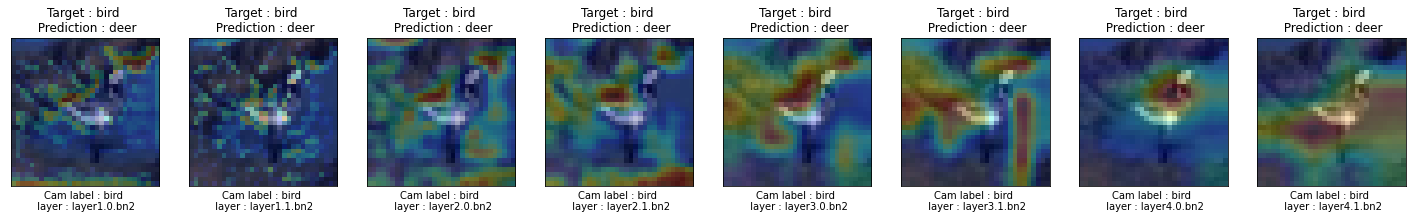

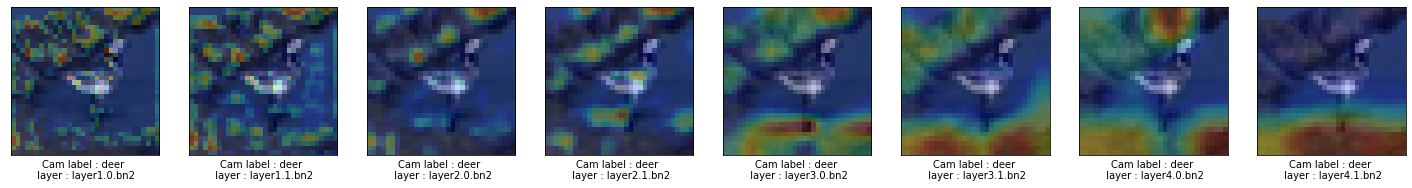

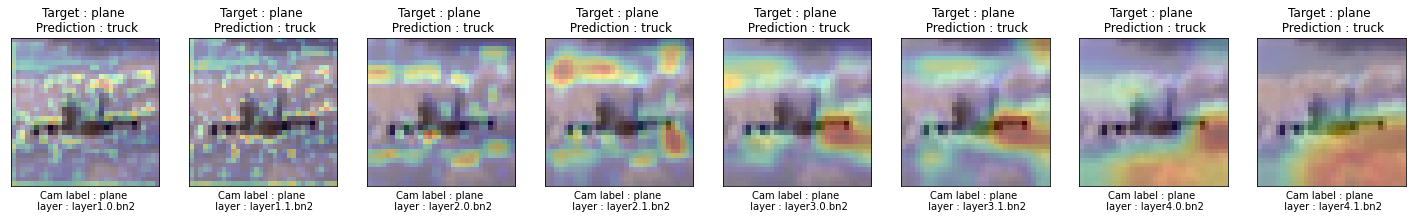

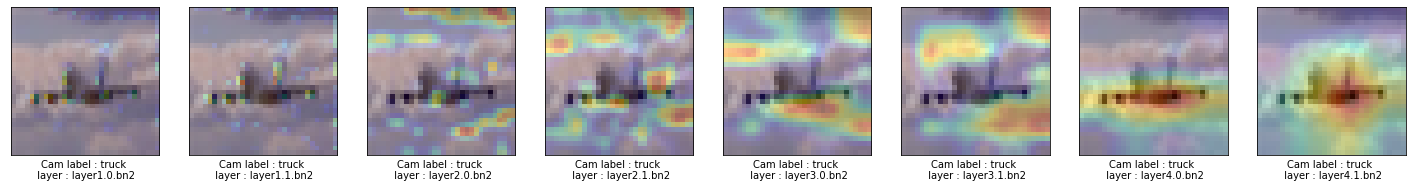

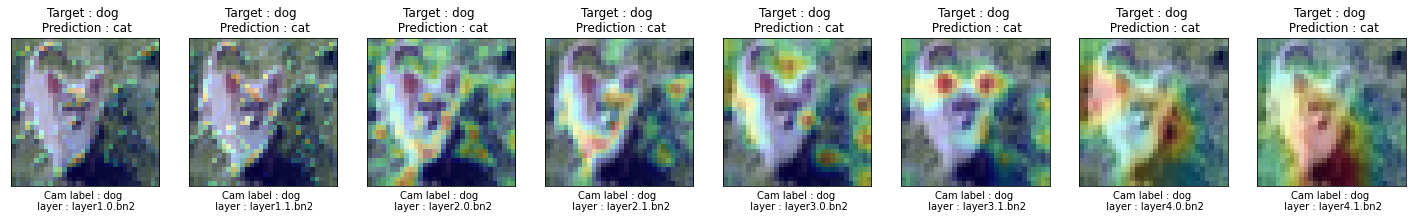

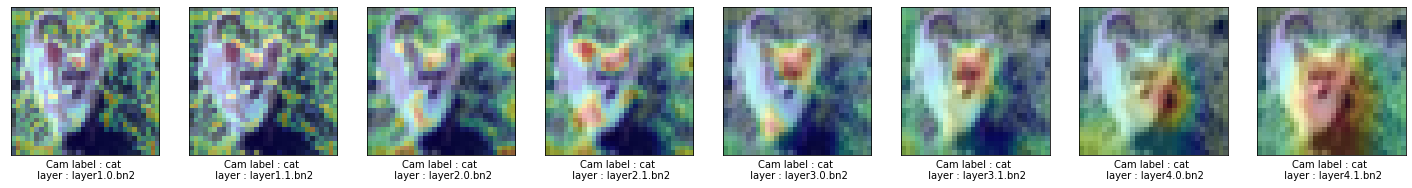

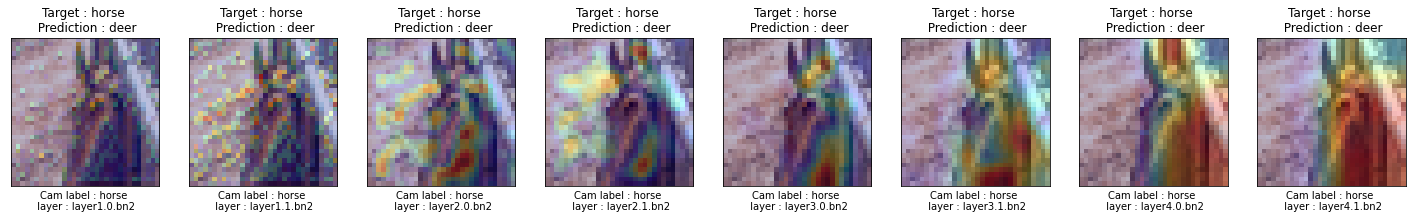

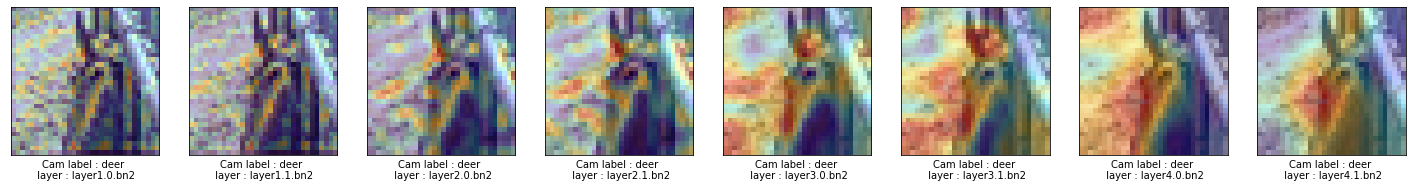

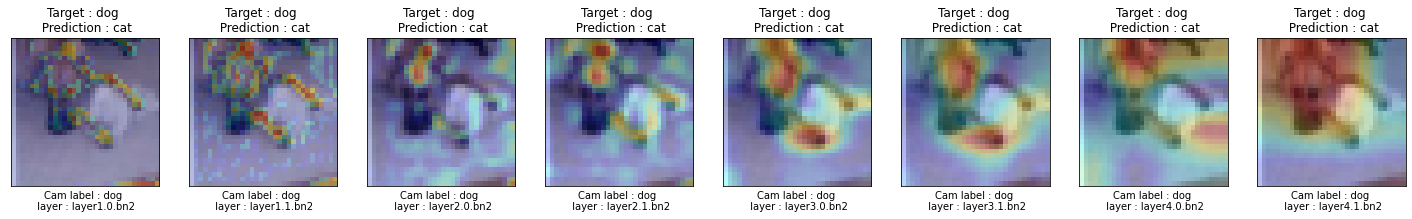

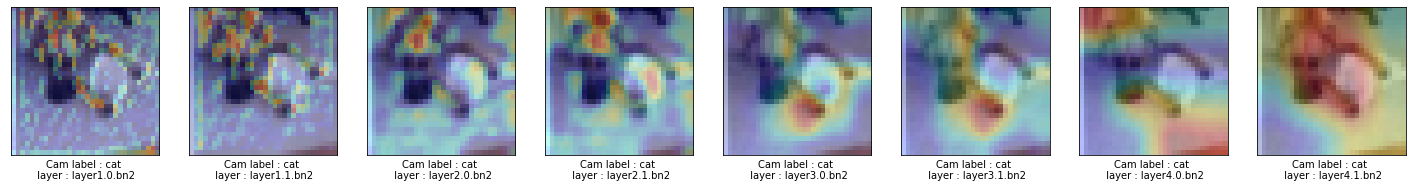

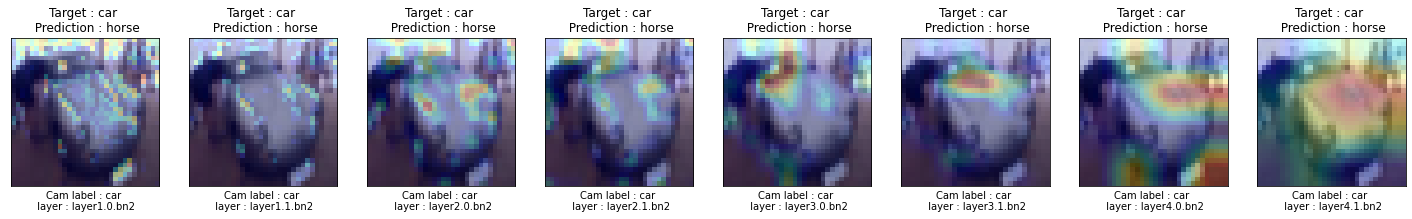

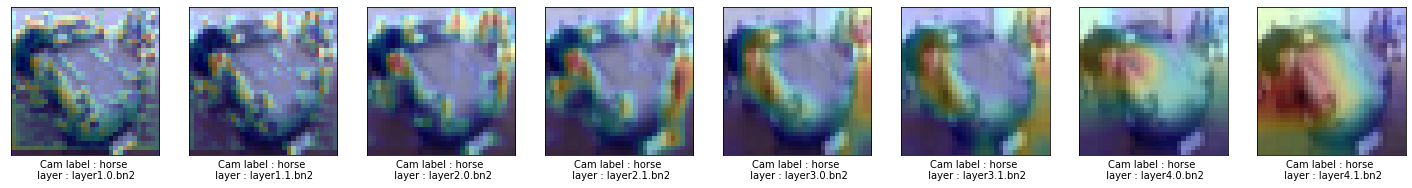

In [20]:
for idx, sample in enumerate(mis_classified_images):
  image = sample['data']
  prediction = sample['prediction']
  target = sample['target']
  
  one_hot_label = target
  overlays = grad_cam.get_overlays(image, one_hot_label, target)
  grad_cam.display_heatmaps(overlays, prediction, target, one_hot_label, title=True)

  one_hot_label = prediction
  overlays = grad_cam.get_overlays(image, one_hot_label, target)
  grad_cam.display_heatmaps(overlays, prediction, target, one_hot_label, title=False)

# Result
| Metric | Value |
| - | - |
| _Best train accuracy_| **95.12** |
| _Best test accuracy_| **91.61** |
| _Best epoch number_| **49** |
| _Parameter count_ | **11,173,962** |